In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
import pandas as pd
import torch
import torch_explain as te
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
target = torch.tensor(data.target, dtype=torch.long)

# print(target)

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
bins = 3

est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
est.fit(df)

dfTransformed = pd.DataFrame(est.transform(df), columns=data.feature_names)
dfTransformed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0
3,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,...,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
categories = {0: 'very low', 1: 'low', 2: 'medium', 3: 'high', 4: 'very high'}

dfEncoded = dfTransformed.copy()

for col in dfEncoded.columns:
    dfEncoded[col] = dfEncoded[col].map(categories)

dfEncoded = pd.get_dummies(dfEncoded)

x_train = torch.tensor(dfEncoded.to_numpy(), dtype=torch.float)

dfEncoded.head()

,mean radius_low,mean radius_medium,mean radius_very low,mean texture_low,mean texture_medium,mean texture_very low,mean perimeter_low,mean perimeter_medium,mean perimeter_very low,mean area_low,...,worst concavity_very low,worst concave points_low,worst concave points_medium,worst concave points_very low,worst symmetry_low,worst symmetry_medium,worst symmetry_very low,worst fractal dimension_low,worst fractal dimension_medium,worst fractal dimension_very low
0,1,0,0,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,1,0,0,1
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
3,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,1,0,0,1


In [4]:


layers = [
    te.nn.EntropyLinear(x_train.shape[1], 10, n_classes=2),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(10, 4),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(4, 1),
]
model = torch.nn.Sequential(*layers)

In [5]:
# def correct(pred, target):
#     pred = (pred.detach().numpy() > 0).astype(int)
#     target = np.array(target)
#     correct = 0
#     for i in range(len(pred)):
#         if np.abs(pred[i]) == target[i]:
#             correct += 1
#     return round(correct / len(pred), 2)


def correct(pred, target):

    return np.sum(np.array((pred.argmax(dim=1) == target))) / len(target)

In [6]:
print(x_train.shape)

torch.Size([569, 90])


In [7]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)
loss_form = torch.nn.CrossEntropyLoss()
losshistory = []
accuracyhistory = []

model.train()
for epoch in range(1001):
    optimizer.zero_grad()
    y_pred = model(x_train).squeeze(-1)
    # y_pred = y_pred.view(y_pred.shape[0])
    # print(y_pred)
    # fel = te.nn.functional.entropy_logic_loss(model)
    # print(target)
    # print(y_pred)
    loss = loss_form(y_pred, target) 
    losshistory.append(float(loss))
    numcorrect = correct(y_pred, target)
    accuracyhistory.append(numcorrect)
    print(float(loss), numcorrect) if epoch % 100 == 0 else None
    loss.backward()
    optimizer.step()
    # print(correct(model))



0.6896488666534424 0.6432337434094904
0.07900502532720566 0.9701230228471002
0.06409835815429688 0.9753954305799648
0.05409673973917961 0.9824253075571178
0.03598222881555557 0.9876977152899824
0.0262127835303545 0.9894551845342706
0.023010488599538803 0.9894551845342706
0.022142624482512474 0.9894551845342706
0.02161206491291523 0.9894551845342706
0.021974343806505203 0.9894551845342706
0.12720324099063873 0.9420035149384886


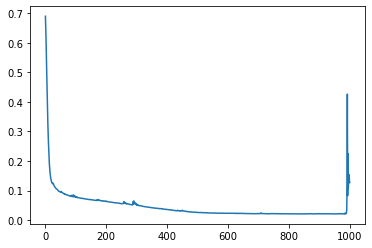

In [8]:
plt.plot(np.arange(0,len(losshistory)), losshistory)
plt.show()

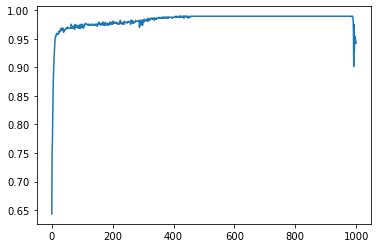

In [9]:
plt.plot(np.arange(0, len(accuracyhistory)), accuracyhistory)
plt.show()

In [14]:
from torch_explain.logic.nn import entropy
from torch.nn.functional import one_hot
y1h = one_hot(target)
# print(y1h)
explanation, _ = entropy.explain_class(model, x_train, y1h, x_train, y1h, target_class=1)

print(explanation)

~feature0000000008 & ~feature0000000017 & ~feature0000000018


In [11]:
from torch_explain.logic.metrics import test_explanation, complexity
accuracy, preds = test_explanation(explanation, x_train, y1h, target_class=1)
explanation_complexity = complexity(explanation)

print(explanation_complexity, accuracy)

3 0.264137330175066
